In [1]:
%matplotlib inline

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.stats.diagnostic as dg
import statsmodels.tools.tools as ct
import statsmodels.regression.linear_model as rg
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import seaborn as sns

import tensorflow as tf

In [3]:
raw_data = pd.read_csv(r'data\raw_df.csv')
#S&P 500 1990 - 2021
raw_data = raw_data[raw_data.Date>"2011-01-01"]
raw_data

,Date,High,Low,Open,Close,Volume,Adj Close,ewm_short,ma_short,rsi,macd,bolu,bold
5295,2011-01-03,1276.170044,1257.619995,1257.619995,1271.869995,4286670000,1271.869995,1244.844144,1245.610950,75.531546,14.922312,1271.609915,1220.700082
5296,2011-01-04,1274.119995,1262.660034,1272.949951,1270.199951,4796420000,1270.199951,1247.149217,1247.777140,73.633646,15.054170,1273.462435,1223.427225
5297,2011-01-05,1277.630005,1265.359985,1268.780029,1276.560059,4764920000,1276.560059,1249.822930,1250.321905,76.096958,15.493279,1276.000587,1225.472407
5298,2011-01-06,1278.170044,1270.430054,1276.290039,1273.849976,4844100000,1273.849976,1252.007207,1252.707618,72.968657,15.444560,1277.612225,1228.718769
5299,2011-01-07,1276.829956,1261.699951,1274.410034,1271.500000,4963110000,1271.500000,1253.779279,1254.765712,70.271023,15.042921,1278.453842,1231.726151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941,4665.205811,4644.646229,61.358473,24.313332,4766.156623,4523.965789
8060,2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098,4676.218928,4653.776228,60.863656,30.850591,4788.911557,4515.208527
8061,2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059,4686.840849,4660.337658,61.329270,36.156068,4808.662580,4515.530177
8062,2021-12-30,4808.930176,4775.330078,4794.229980,4778.729980,2390990000,4778.729980,4695.194407,4670.420038,59.695830,38.757607,4821.781582,4525.302516


In [4]:
raw_data.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
ewm_short    float64
ma_short     float64
rsi          float64
macd         float64
bolu         float64
bold         float64
dtype: object

In [5]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,2769.0,2.373708e+03,8.638804e+02,1.125120e+03,1.707850e+03,2.131450e+03,2.858680e+03,4.808930e+03
Low,2769.0,2.349263e+03,8.562384e+02,1.074770e+03,1.694900e+03,2.115400e+03,2.825510e+03,4.780040e+03
Open,2769.0,2.361888e+03,8.600500e+02,1.097420e+03,1.700490e+03,2.123650e+03,2.842430e+03,4.795490e+03
Close,2769.0,2.362464e+03,8.603433e+02,1.099230e+03,1.703200e+03,2.125770e+03,2.844740e+03,4.793060e+03
Volume,2769.0,3.757160e+09,9.122647e+08,1.025000e+09,3.225060e+09,3.590070e+09,4.096160e+09,9.878040e+09
Adj Close,2769.0,2.362464e+03,8.603433e+02,1.099230e+03,1.703200e+03,2.125770e+03,2.844740e+03,4.793060e+03
ewm_short,2769.0,2.349970e+03,8.495581e+02,1.159031e+03,1.687323e+03,2.111552e+03,2.832895e+03,4.701648e+03
ma_short,2769.0,2.349954e+03,8.499614e+02,1.162426e+03,1.692100e+03,2.110659e+03,2.836526e+03,4.682474e+03
rsi,2769.0,5.603294e+01,1.097570e+01,1.645758e+01,4.873500e+01,5.733533e+01,6.400012e+01,8.668665e+01
macd,2769.0,8.679158e+00,2.553130e+01,-2.370202e+02,-9.633678e-01,1.070153e+01,1.977139e+01,9.070304e+01


In [6]:
raw_data.isnull().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
ewm_short    False
ma_short     False
rsi          False
macd         False
bolu         False
bold         False
dtype: bool

In [7]:
raw_data.corr()

,High,Low,Open,Close,Volume,Adj Close,ewm_short,ma_short,rsi,macd,bolu,bold
High,1.000000,0.999746,0.999883,0.999836,0.056030,0.999836,0.998772,0.998095,0.150253,0.313011,0.995639,0.997004
Low,0.999746,1.000000,0.999814,0.999859,0.042476,0.999859,0.997951,0.997146,0.162284,0.325153,0.993914,0.996921
Open,0.999883,0.999814,1.000000,0.999710,0.051114,0.999710,0.998509,0.997782,0.152698,0.318852,0.994960,0.997108
Close,0.999836,0.999859,0.999710,1.000000,0.048511,1.000000,0.998288,0.997538,0.159520,0.319117,0.994720,0.996842
Volume,0.056030,0.042476,0.051114,0.048511,1.000000,0.048511,0.064293,0.065811,-0.230885,-0.232350,0.095460,0.033235
Adj Close,0.999836,0.999859,0.999710,1.000000,0.048511,1.000000,0.998288,0.997538,0.159520,0.319117,0.994720,0.996842
ewm_short,0.998772,0.997951,0.998509,0.998288,0.064293,0.998288,1.000000,0.999862,0.115926,0.276315,0.998186,0.997826
ma_short,0.998095,0.997146,0.997782,0.997538,0.065811,0.997538,0.999862,1.000000,0.109267,0.269871,0.998318,0.997952
rsi,0.150253,0.162284,0.152698,0.159520,-0.230885,0.159520,0.115926,0.109267,1.000000,0.639857,0.097200,0.122700
macd,0.313011,0.325153,0.318852,0.319117,-0.232350,0.319117,0.276315,0.269871,0.639857,1.000000,0.239843,0.304617


In [8]:
corr = raw_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close,ewm_short,ma_short,rsi,macd,bolu,bold
High,1.000000,0.999746,0.999883,0.999836,0.056030,0.999836,0.998772,0.998095,0.150253,0.313011,0.995639,0.997004
Low,0.999746,1.000000,0.999814,0.999859,0.042476,0.999859,0.997951,0.997146,0.162284,0.325153,0.993914,0.996921
Open,0.999883,0.999814,1.000000,0.999710,0.051114,0.999710,0.998509,0.997782,0.152698,0.318852,0.994960,0.997108
Close,0.999836,0.999859,0.999710,1.000000,0.048511,1.000000,0.998288,0.997538,0.159520,0.319117,0.994720,0.996842
Volume,0.056030,0.042476,0.051114,0.048511,1.000000,0.048511,0.064293,0.065811,-0.230885,-0.232350,0.095460,0.033235
Adj Close,0.999836,0.999859,0.999710,1.000000,0.048511,1.000000,0.998288,0.997538,0.159520,0.319117,0.994720,0.996842
ewm_short,0.998772,0.997951,0.998509,0.998288,0.064293,0.998288,1.000000,0.999862,0.115926,0.276315,0.998186,0.997826
ma_short,0.998095,0.997146,0.997782,0.997538,0.065811,0.997538,0.999862,1.000000,0.109267,0.269871,0.998318,0.997952
rsi,0.150253,0.162284,0.152698,0.159520,-0.230885,0.159520,0.115926,0.109267,1.000000,0.639857,0.097200,0.122700
macd,0.313011,0.325153,0.318852,0.319117,-0.232350,0.319117,0.276315,0.269871,0.639857,1.000000,0.239843,0.304617


In [9]:
sorted(tuple(set(raw_data['Date'].astype(str).apply(lambda x:x[:-6]).astype(int))))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

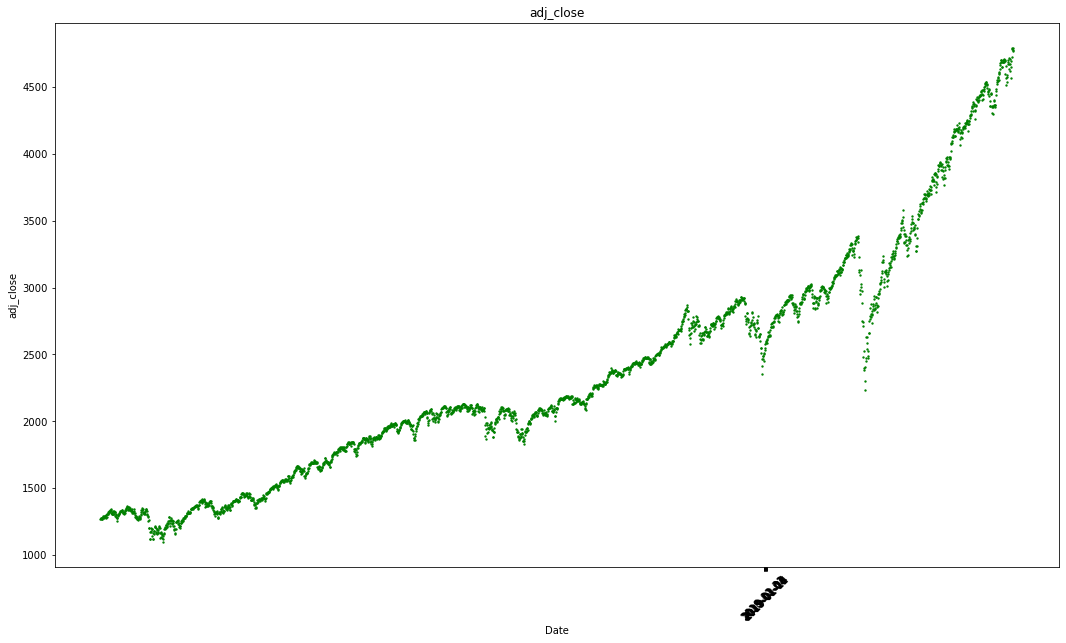

In [67]:
plt.figure()
plt.rcParams["figure.figsize"] = [12, 8]
plt.title('adj_close')
plt.scatter(raw_data.Date, raw_data['Adj Close'], c='green', s=2, alpha=0.9, cmap='viridis')
plt.ylabel('adj_close')
plt.xlabel('Date' )
labels = sorted(tuple(set(raw_data['Date'].astype(str).apply(lambda x:x[:-6]).astype(int))))
plt.xticks(labels,rotation=45)
plt.show()

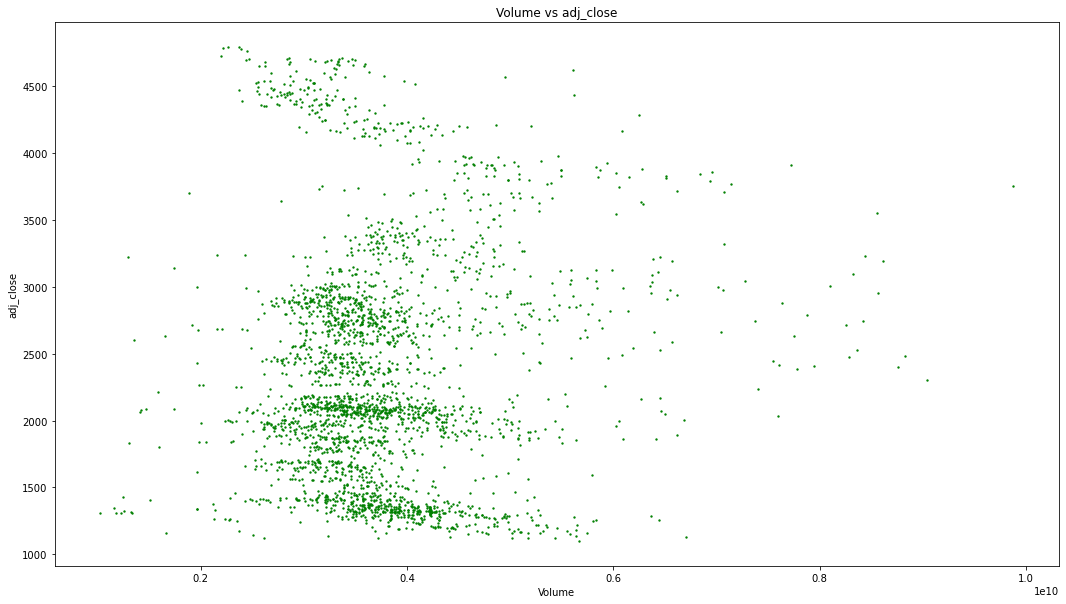

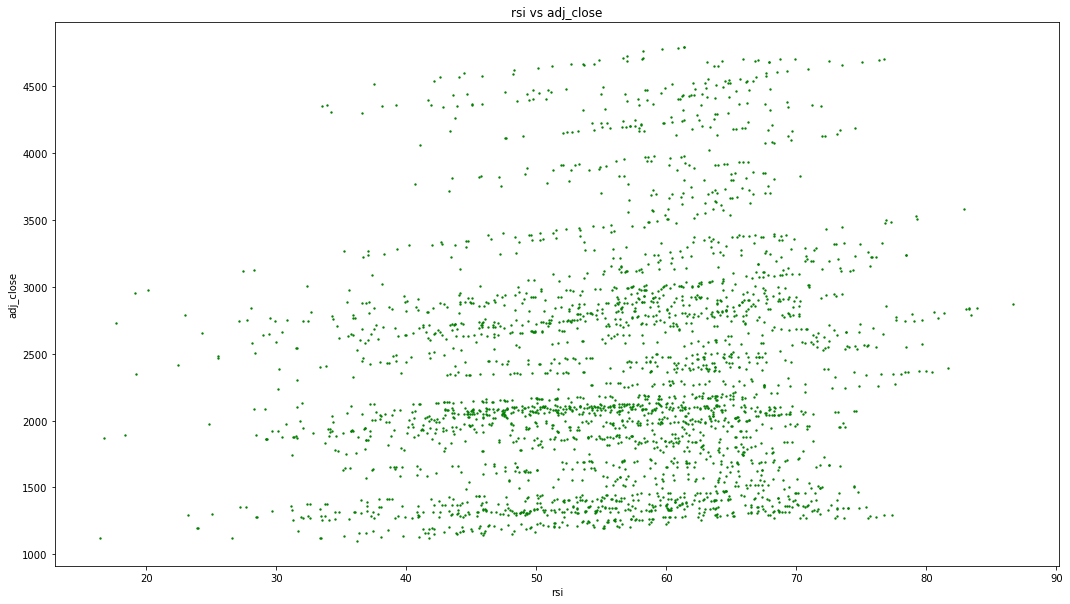

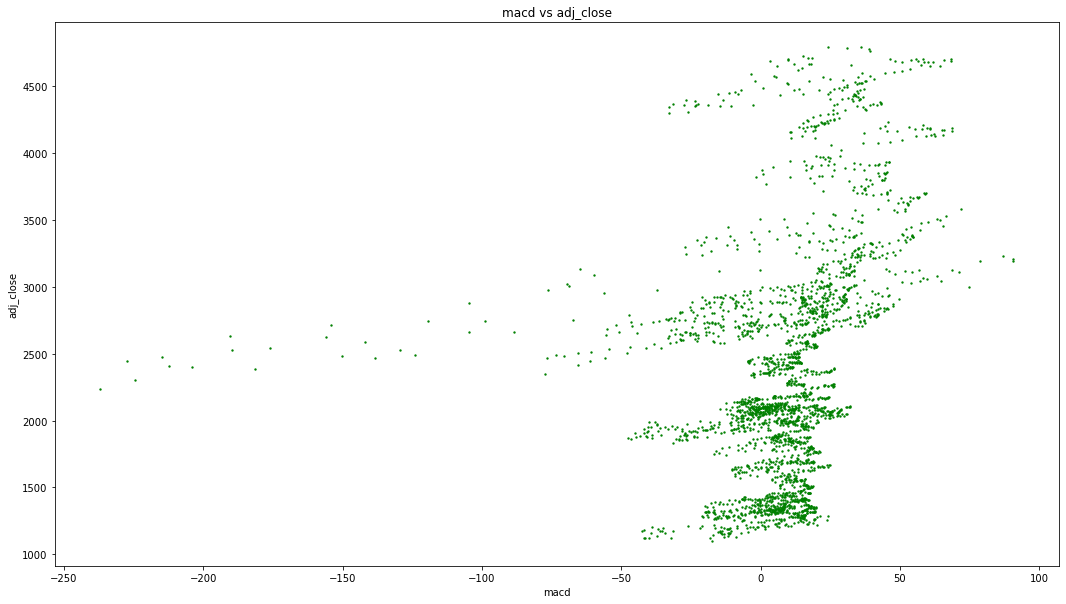

In [11]:
feature_name = raw_data.columns[1:]
adj_close = raw_data['Adj Close']
for name in feature_name:    
    ftch = raw_data[name]
    adj_close = raw_data['Adj Close']
    if adj_close.corr(ftch)<=0.5:
        plt.figure()
        plt.title(f'{name} vs adj_close')
        plt.scatter(ftch, adj_close, c='green', s=2, alpha=0.9, cmap='viridis')
        plt.ylabel('adj_close')
        plt.xlabel(f'{name}')
plt.show()

In [12]:
raw_data

,Date,High,Low,Open,Close,Volume,Adj Close,ewm_short,ma_short,rsi,macd,bolu,bold
5295,2011-01-03,1276.170044,1257.619995,1257.619995,1271.869995,4286670000,1271.869995,1244.844144,1245.610950,75.531546,14.922312,1271.609915,1220.700082
5296,2011-01-04,1274.119995,1262.660034,1272.949951,1270.199951,4796420000,1270.199951,1247.149217,1247.777140,73.633646,15.054170,1273.462435,1223.427225
5297,2011-01-05,1277.630005,1265.359985,1268.780029,1276.560059,4764920000,1276.560059,1249.822930,1250.321905,76.096958,15.493279,1276.000587,1225.472407
5298,2011-01-06,1278.170044,1270.430054,1276.290039,1273.849976,4844100000,1273.849976,1252.007207,1252.707618,72.968657,15.444560,1277.612225,1228.718769
5299,2011-01-07,1276.829956,1261.699951,1274.410034,1271.500000,4963110000,1271.500000,1253.779279,1254.765712,70.271023,15.042921,1278.453842,1231.726151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941,4665.205811,4644.646229,61.358473,24.313332,4766.156623,4523.965789
8060,2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098,4676.218928,4653.776228,60.863656,30.850591,4788.911557,4515.208527
8061,2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059,4686.840849,4660.337658,61.329270,36.156068,4808.662580,4515.530177
8062,2021-12-30,4808.930176,4775.330078,4794.229980,4778.729980,2390990000,4778.729980,4695.194407,4670.420038,59.695830,38.757607,4821.781582,4525.302516


In [49]:
data_for_test = raw_data[["Adj Close", "Volume", "rsi", "macd"]]
data_for_test

,Adj Close,Volume,rsi,macd
5295,1271.869995,4286670000,75.531546,14.922312
5296,1270.199951,4796420000,73.633646,15.054170
5297,1276.560059,4764920000,76.096958,15.493279
5298,1273.849976,4844100000,72.968657,15.444560
5299,1271.500000,4963110000,70.271023,15.042921
...,...,...,...,...
8059,4791.189941,2264120000,61.358473,24.313332
8060,4786.350098,2217050000,60.863656,30.850591
8061,4793.060059,2369370000,61.329270,36.156068
8062,4778.729980,2390990000,59.695830,38.757607


In [70]:
def breuschpagan_statistic(df, param):
    df = ct.add_constant(df)
    ivar = ["const"] + param
    reg = rg.OLS(df["Adj Close"], df[ivar], hasconst=bool).fit()
    res = reg.resid
    dw = durbin_watson(res,axis=0)
    bplmt_statistic = np.round(dg.het_breuschpagan(res, exog_het = df[ivar])[0], 6)
    bplmt_p_value = np.round(dg.het_breuschpagan(res, exog_het = df[ivar])[1], 6)

#     y_predicted = reg.predict(df[ivar])
#     residuals = df["Adj Close"]-y_predicted
#     plt.plot(df[ivar],residuals, 'o', color='darkblue')
#     plt.title("Residual Plot")
#     plt.xlabel("Independent Variable")
#     plt.ylabel("Residual")
#     plt.show()

    return bplmt_statistic, bplmt_p_value, dw, df[ivar]

In [23]:
data_for_test


,Adj Close,Volume,rsi,macd
5295,1271.869995,4286670000,75.531546,14.922312
5296,1270.199951,4796420000,73.633646,15.054170
5297,1276.560059,4764920000,76.096958,15.493279
5298,1273.849976,4844100000,72.968657,15.444560
5299,1271.500000,4963110000,70.271023,15.042921
...,...,...,...,...
8059,4791.189941,2264120000,61.358473,24.313332
8060,4786.350098,2217050000,60.863656,30.850591
8061,4793.060059,2369370000,61.329270,36.156068
8062,4778.729980,2390990000,59.695830,38.757607


--------------------
Heteroskedastic analysis for ['Volume', 'rsi', 'macd']

Breusch-Pagan LM test statistic 56.17422
Breusch-Pagan LM test P-Value:  0.0
durbin_watson:  0.01383620909315798

--------------------
Heteroskedastic analysis for ['Volume', 'rsi']

Breusch-Pagan LM test statistic 18.774558
Breusch-Pagan LM test P-Value:  8.4e-05
durbin_watson:  0.007380790898744512

--------------------
Heteroskedastic analysis for ['rsi']

Breusch-Pagan LM test statistic 17.92981
Breusch-Pagan LM test P-Value:  2.3e-05
durbin_watson:  0.0024961356505533933

--------------------
Heteroskedastic analysis for ['Volume']

Breusch-Pagan LM test statistic 1.065483
Breusch-Pagan LM test P-Value:  0.301968
durbin_watson:  0.002641647133673294



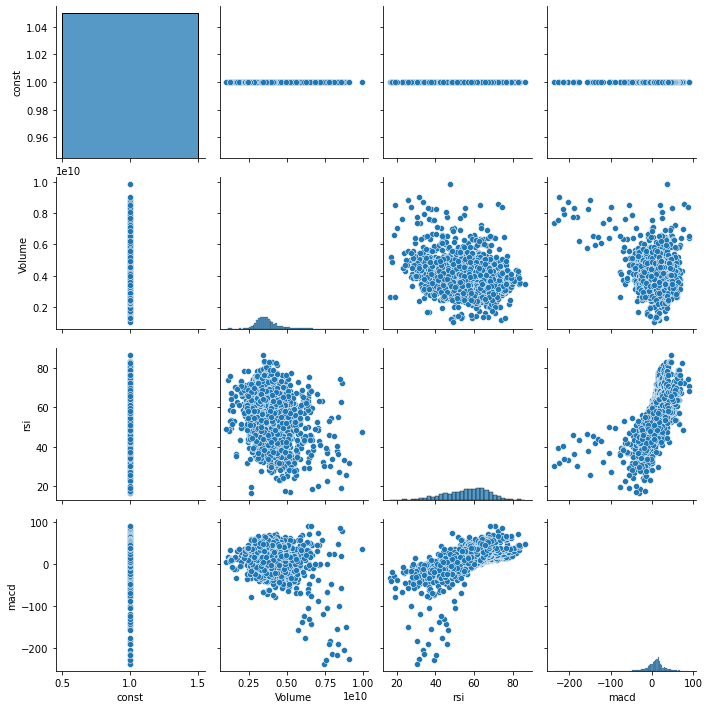

In [73]:
#https://www.youtube.com/watch?v=jy2OurbLFGg
#https://stats.stackexchange.com/questions/239060/interpretation-of-breusch-pagan-test-bptest-in-r/239062
#https://www.statsmodels.org/dev/_modules/statsmodels/stats/diagnostic.html#het_breuschpagan
# https://www.statsmodels.org/stable/_modules/statsmodels/stats/stattools.html#durbin_watson
# https://www.statology.org/durbin-watson-test-python/

parameters =  (["Volume", "rsi", "macd"],["Volume", "rsi"] ,["rsi"],["Volume"])
for el in parameters:
    col_names = ["Adj Close"]+ el
    data_for_test = raw_data[col_names]
    print("--------------------")
    print(f"Heteroskedastic analysis for {el}")
    print()
    print(f"Breusch-Pagan LM test statistic", breuschpagan_statistic(data_for_test, el)[0])
    print("Breusch-Pagan LM test P-Value: ", breuschpagan_statistic(data_for_test, el)[1])
    print("durbin_watson: ", breuschpagan_statistic(data_for_test, el)[2]) 
    print()
sns.pairplot(breuschpagan_statistic(raw_data[["Adj Close", "Volume", "rsi", "macd"]], ["Volume", "rsi", "macd"])[3])
#TODO Chart res

In [74]:
data_for_nn = raw_data[["Date", "Adj Close", "Volume"]]
start_point = data_for_nn[data_for_nn["Date"] == "2013-11-07"].index
data_for_nn = data_for_nn.loc[(start_point[0]):]
data_for_nn.reset_index(inplace = True, drop = True)
data_for_nn

,Date,Adj Close,Volume
0,2013-11-07,1747.150024,4143200000
1,2013-11-08,1770.609985,3837170000
2,2013-11-11,1771.890015,2534060000
3,2013-11-12,1767.689941,3221030000
4,2013-11-13,1782.000000,3327480000
...,...,...,...
2047,2021-12-27,4791.189941,2264120000
2048,2021-12-28,4786.350098,2217050000
2049,2021-12-29,4793.060059,2369370000
2050,2021-12-30,4778.729980,2390990000


In [75]:
# https://finance.yahoo.com/quote/TWTR/history?period1=1383782400&period2=1642723200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
twtr_index_raw = pd.read_csv(r'data\TWTR.csv')
twtr_index = twtr_index_raw[['Date', 'Adj Close']]
twtr_index = twtr_index.loc[:2051]

In [76]:
data = data_for_nn.merge(twtr_index, left_index=True,right_index=True)
data = data.drop(labels=['Date_y'], axis=1)
data

,Date_x,Adj Close_x,Volume,Adj Close_y
0,2013-11-07,1747.150024,4143200000,44.900002
1,2013-11-08,1770.609985,3837170000,41.650002
2,2013-11-11,1771.890015,2534060000,42.900002
3,2013-11-12,1767.689941,3221030000,41.900002
4,2013-11-13,1782.000000,3327480000,42.599998
...,...,...,...,...
2047,2021-12-27,4791.189941,2264120000,44.330002
2048,2021-12-28,4786.350098,2217050000,43.430000
2049,2021-12-29,4793.060059,2369370000,42.759998
2050,2021-12-30,4778.729980,2390990000,44.459999


In [77]:
data.rename(columns = {'Date_x':'date', 'Adj Close_x':'Adj Close',
                              'Adj Close_y':'twtr', 'Volume':'volume'}, inplace = True)

In [30]:
data

,date,Adj Close,volume,twtr
0,2013-11-07,1747.150024,4143200000,44.900002
1,2013-11-08,1770.609985,3837170000,41.650002
2,2013-11-11,1771.890015,2534060000,42.900002
3,2013-11-12,1767.689941,3221030000,41.900002
4,2013-11-13,1782.000000,3327480000,42.599998
...,...,...,...,...
2047,2021-12-27,4791.189941,2264120000,44.330002
2048,2021-12-28,4786.350098,2217050000,43.430000
2049,2021-12-29,4793.060059,2369370000,42.759998
2050,2021-12-30,4778.729980,2390990000,44.459999


Breusch-Pagan LM test statistic 2043.88849
Breusch-Pagan LM test P-Value:  0.0
Durbin_watson:  0.0017625180068012744
Correlaton matrix: 


,Adj Close,volume,twtr
Adj Close,1.000,0.080,0.526
volume,0.080,1.000,-0.034
twtr,0.526,-0.034,1.000


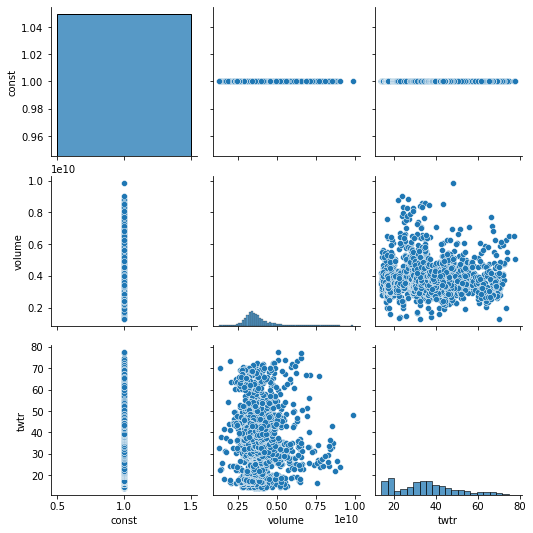

In [90]:
col_names = ["Adj Close"]+["volume", "twtr"]
data_for_test = data[col_names]

print(f"Breusch-Pagan LM test statistic", breuschpagan_statistic(data_for_test, col_names)[0])
print("Breusch-Pagan LM test P-Value: ", breuschpagan_statistic(data_for_test, col_names)[1])
print("Durbin_watson: ", breuschpagan_statistic(data_for_test, col_names)[2])  
sns.pairplot(breuschpagan_statistic(data_for_test[["Adj Close", "volume", "twtr"]], ["volume", "twtr"])[3])
print("Correlaton matrix: ")
round(data_for_test.corr(),3)
#TODO Chart res

In [ ]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [32]:
data.to_csv(r'data\data_to preprocessing.csv', encoding='utf-8', header='true')